# Part 3: Plotting and Data Visualization in Python
## Data Analysis Using Python: A Beginner’s Guide Featuring NYC Open Data  

Author: Mark Bauer

Table of Contents
=================

   1. Importing Libraries
   2. Reading In Data   
   3. pandas and Matplotlib Libraries
       * 3.1 Line Plot
       * 3.2 Bar Plot
       * 3.3 Histogram
       * 3.4 Box Plot
       * 3.5 Kernel Density Estimate (KDE) Plot
       * 3.6 Area Plot
       * 3.7 Scatter Plot
       * 3.8 Hexagonal Bin Plo
       * 3.9 Pie Plot
   4. Seaborn Library
       * 4.1 Distribution Plots
           * 4.1.1 Histograms
           * 4.1.2 Kernel Density Estimate (KDE) Plot
           * 4.1.3 Empirical Cumulative Distribution Functions (ECDF)
           * 4.1.4 Distribution Plots onto a Facet Grid    
       * 4.2 Relational Plots
           * 4.2.1 Line Plots
           * 4.2.2 Scatter Plot
           * 4.2.3 Relational Plots onto a Facet Grid  
       * 4.3 Joint Grids
           * 4.3.1 Scatter Plot
           * 4.3.2 Hexagonal Bin Plots
           * 4.3.3 Kernel Density Estimate (KDE) Plot
       * 4.4 Visualizing Pairwise Relationships in a Dataset  
           * 4.4.1 Pairwise Plot
       * 4.5 Heat Map  
       * 4.6 Categorial Plots
           * 4.6.1 Bar Plots
           * 4.6.2 Scatter Plots
           * 4.6.3 Swarm Plots
           * 4.6.4 Box Plots
           * 4.6.5 Boxen Plots
           * 4.6.6 Violin Plots
   5. Conclusion

**Goal:** In this notebook, we review various methods of plotting and examples of data visualizations.

**Objective:** Analyzing buildings built between 2010 and 2020 in NYC.

**Main Libraries:**  
[pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.  
[Matplotlib](https://matplotlib.org/3.1.1/index.html#) is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.  
[Seaborn](https://seaborn.pydata.org/index.html) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

# Datasets

## 1) Building Footprints  
Source: https://data.cityofnewyork.us/Housing-Development/Building-Footprints/nqwf-w8eh

![building-footprints](images/building-footprints.png)

## 2) Primary Land Use Tax Lot Output (PLUTO)  
Source: https://data.cityofnewyork.us/City-Government/Primary-Land-Use-Tax-Lot-Output-Map-MapPLUTO-/f888-ni5f

![pluto](images/pluto.png)

# 1. Importing Libraries

In [1]:
# importing libraries
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# set seaborn theme
sns.set(color_codes=True)

Print verions of Python modules and packages with watermark - the IPython magic extension. Documention for installing watermark: https://github.com/rasbt/watermark. Performed for reproducibility.

In [2]:
# watermark
%reload_ext watermark
%watermark -v -p numpy,pandas,matplotlib,seaborn

Python implementation: CPython
Python version       : 3.11.0
IPython version      : 8.6.0

numpy     : 1.23.4
pandas    : 1.5.1
matplotlib: 3.6.2
seaborn   : 0.12.1



# 2. Read In Data

In [3]:
# read data into dataframe
path = 'data/building-footprints-pluto.csv'
building_footprints = pd.read_csv(path)

# printing the shape or dimensions of our dataframe (i.e. rows, columns)
rows, columns = building_footprints.shape
print(f'rows: {rows:,}\ncolumns: {columns}')
      
# preview data, sanity check
building_footprints.head()

rows: 15,673
columns: 28


the_geom NAME      BIN  \
0  MULTIPOLYGON (((-73.87172426474349 40.65519420...  NaN  3394834   
1  MULTIPOLYGON (((-73.87172426474349 40.65519420...  NaN  3394833   
2  MULTIPOLYGON (((-73.86650099829305 40.74236058...  NaN  4540159   
3  MULTIPOLYGON (((-73.87805078807256 40.71475698...  NaN  4540051   
4  MULTIPOLYGON (((-73.87803271958461 40.71468859...  NaN  4608920   

   CNSTRCT_YR              LSTMODDATE   LSTSTATYPE  DOITT_ID  HEIGHTROOF  \
0        2011  08/22/2017 12:00:00 AM  Constructed   1250314   26.000000   
1        2011  12/07/2018 12:00:00 AM  Constructed   1250462   26.000000   
2        2010  08/22/2017 12:00:00 AM  Constructed    201366   28.000000   
3        2010  08/22/2017 12:00:00 AM  Constructed   1171655   28.330225   
4        2010  08/17/2017 12:00:00 AM  Constructed   1266801   11.414818   

   FEAT_CODE  GROUNDELEV  ...  zipcode  bldgclass  landuse  borough  \
0       2100        15.0  ...  11239.0         A5        1       BK   
1       2100        15.0  ...  11239.0         A5        1       BK   
2       2100        37.0  ...  11368.0         S2        4       QN   
3       2100       112.0  ...  11379.0         B1        1       QN   
4       5110       111.0  ...  11379.0         B1        1       QN   

      xcoord    ycoord   latitude  longitude  firm07_flag pfirm15_flag  
0  1019842.0  178007.0  40.655193 -73.871725            0            0  
1  1019842.0  178007.0  40.655193 -73.871725            0            0  
2  1021273.0  209767.0  40.742361 -73.866393            0            0  
3  1018081.0  199706.0  40.714759 -73.877963            0            0  
4  1018081.0  199706.0  40.714759 -73.877963            0            0  

[5 rows x 28 columns]

In [4]:
# printing the column names, non-null counts, and datatypes of our columns
building_footprints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15673 entries, 0 to 15672
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   the_geom      15673 non-null  object 
 1   NAME          76 non-null     object 
 2   BIN           15673 non-null  int64  
 3   CNSTRCT_YR    15673 non-null  int64  
 4   LSTMODDATE    15673 non-null  object 
 5   LSTSTATYPE    15571 non-null  object 
 6   DOITT_ID      15673 non-null  int64  
 7   HEIGHTROOF    14124 non-null  float64
 8   FEAT_CODE     15673 non-null  int64  
 9   GROUNDELEV    15425 non-null  float64
 10  SHAPE_AREA    15673 non-null  int64  
 11  SHAPE_LEN     15673 non-null  int64  
 12  BASE_BBL      15673 non-null  int64  
 13  MPLUTO_BBL    15673 non-null  int64  
 14  GEOMSOURCE    15623 non-null  object 
 15  GLOBALID      15673 non-null  object 
 16  geometry      15673 non-null  object 
 17  bbl           15673 non-null  int64  
 18  zipcode       15660 non-nu

# 3. pandas and Matplotlib Libraries
I'll demonstrate data visualizations using pandas and Matplotlib first and then switch to Seaborn. I personally like and prefer plotting in Seaborn and encourage you to review Seaborn's [documentation](https://seaborn.pydata.org/), which is beautiful and informative. I've learned so much about statistical data visualization from it.

For now, let's create quick plots using pandas, which is built on matplotlib.
## 3.1 Line Plot

In [5]:
# count of buildings by year
by_year = (
    building_footprints
    .groupby('CNSTRCT_YR')[['DOITT_ID']]
    .count()
    .rename(columns={'DOITT_ID': 'count'})
    .reset_index()
)

by_year.head()

CNSTRCT_YR  count
0        2010   1361
1        2011   1490
2        2012   1456
3        2013    913
4        2014    873

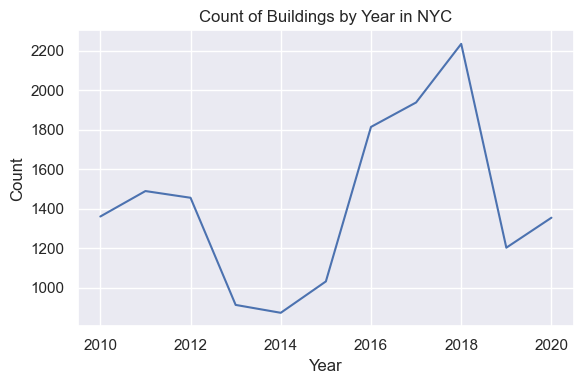

In [6]:
fig, ax = plt.subplots(figsize=(6, 4))

by_year.plot(
    x='CNSTRCT_YR', 
    y='count', 
    legend=False, 
    ax=ax
)

plt.title('Count of Buildings by Year in NYC')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()

In [7]:
# create pivot table to summarize counts by borough
table = pd.pivot_table(
    building_footprints, 
    values='DOITT_ID', 
    index=['CNSTRCT_YR'], 
    columns=['borough'], 
    aggfunc='count'
)

table.head()

borough      BK   BX  MN   QN   SI
CNSTRCT_YR                        
2010        248  141  58  574  340
2011        270   99  43  631  447
2012        428   75  59  510  384
2013        260   51  57  360  185
2014        150   79  23  343  278

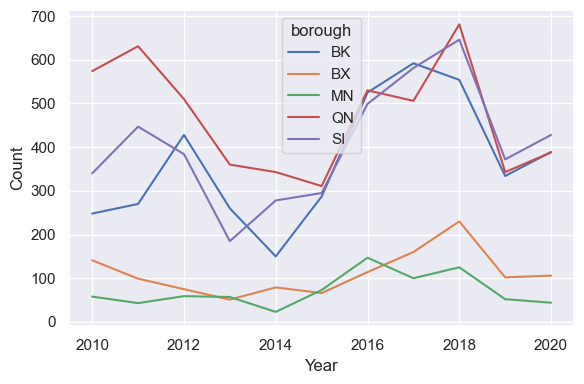

In [8]:
fig, ax = plt.subplots(figsize=(6, 4))

table.plot(ax=ax)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()

In [9]:
# calculate cumulative sum
table_cumsum = table.cumsum()
table_cumsum.head()

borough       BK   BX   MN    QN    SI
CNSTRCT_YR                            
2010         248  141   58   574   340
2011         518  240  101  1205   787
2012         946  315  160  1715  1171
2013        1206  366  217  2075  1356
2014        1356  445  240  2418  1634

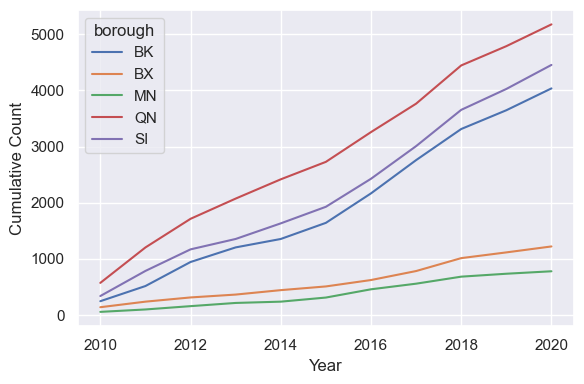

In [10]:
fig, ax = plt.subplots(figsize=(6, 4))

table_cumsum.plot(ax=ax)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Cumulative Count', fontsize=12)

plt.tight_layout()

## 3.2 Bar Plot

In [11]:
bar_df = (
    building_footprints
    .groupby('borough')[['DOITT_ID']]
    .count()
    .reset_index()
    .rename(columns={"DOITT_ID":"count"})
    .sort_values(by='count', ascending=False)
)

bar_df

borough  count
3      QN   5177
4      SI   4455
0      BK   4037
1      BX   1223
2      MN    781

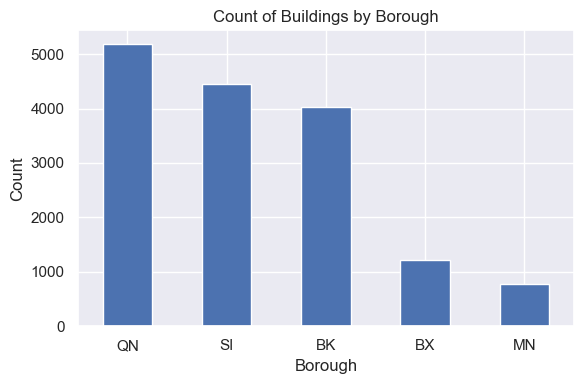

In [12]:
fig, ax = plt.subplots(figsize=(6, 4))

bar_df.plot(
    kind='bar',
    x='borough',
    y='count',
    legend=False,
    ax=ax
)

plt.title('Count of Buildings by Borough')
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)

plt.tight_layout()

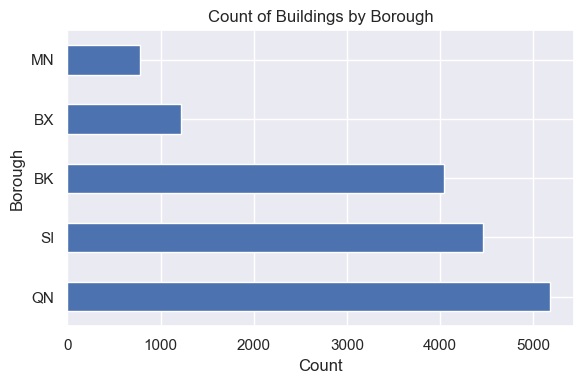

In [13]:
fig, ax = plt.subplots(figsize=(6, 4))

# flip x, y axis
bar_df.plot.barh(
    x='borough',
    y='count',
    legend=False,
    ax=ax
)

plt.title('Count of Buildings by Borough')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Borough', fontsize=12)
plt.xticks(rotation=0)

plt.tight_layout()

In [14]:
# pivot to calculate counts by borough
table = pd.pivot_table(
    building_footprints, 
    values='DOITT_ID', 
    index=['CNSTRCT_YR'], 
    columns=['borough'], 
    aggfunc='count'
)

table.head()

borough      BK   BX  MN   QN   SI
CNSTRCT_YR                        
2010        248  141  58  574  340
2011        270   99  43  631  447
2012        428   75  59  510  384
2013        260   51  57  360  185
2014        150   79  23  343  278

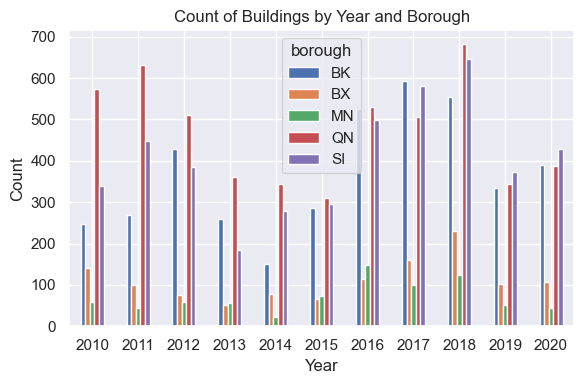

In [15]:
fig, ax = plt.subplots(figsize=(6, 4))

table.plot(kind='bar', ax=ax)

plt.title('Count of Buildings by Year and Borough')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)

plt.tight_layout()

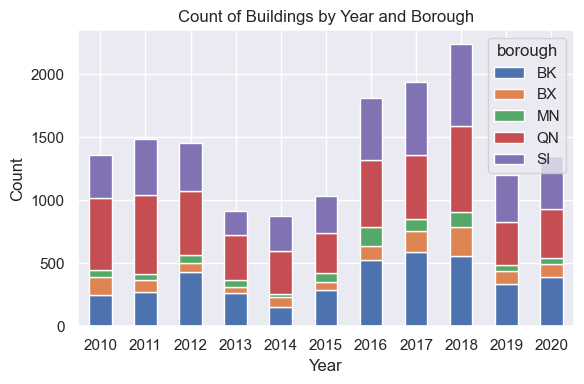

In [16]:
fig, ax = plt.subplots(figsize=(6, 4))

table.plot.bar(stacked=True, ax=ax)

plt.title('Count of Buildings by Year and Borough')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)

plt.tight_layout()

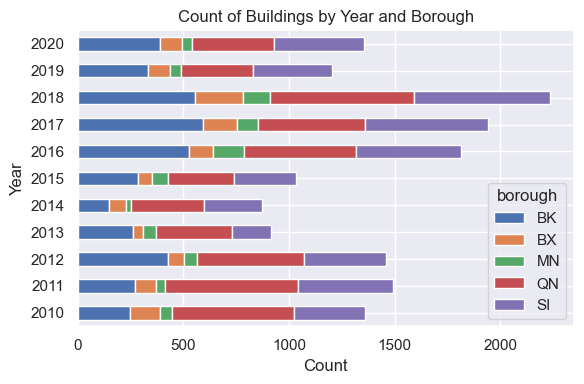

In [17]:
fig, ax = plt.subplots(figsize=(6, 4))

# flip x, y axis
(table
 .sort_index(ascending=True)
 .plot
 .barh(stacked=True, ax=ax)
)

plt.title('Count of Buildings by Year and Borough')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.xticks(rotation=0)

plt.tight_layout()

## 3.3 Histogram

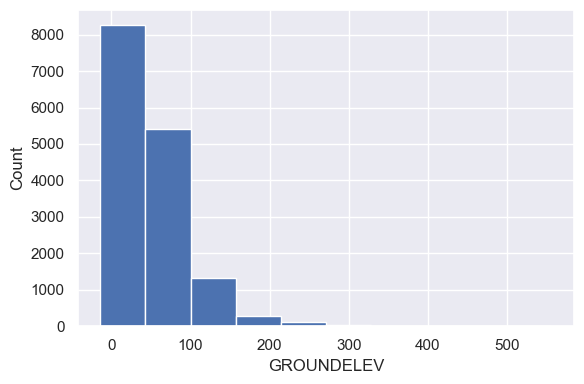

In [18]:
fig, ax = plt.subplots(figsize=(6, 4))

building_footprints.hist(
    column='GROUNDELEV',
    ax=ax
)

plt.title('')
plt.xlabel('GROUNDELEV', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()

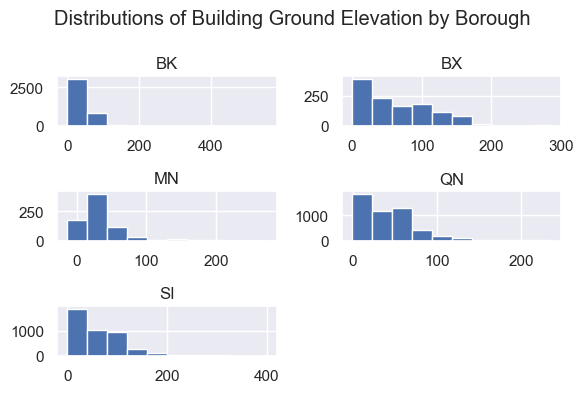

In [19]:
# histograms per group
building_footprints.hist(
    figsize=(6, 4), 
    column='GROUNDELEV', 
    by='borough',
    xrot=0
)

plt.suptitle('Distributions of Building Ground Elevation by Borough')

plt.tight_layout()

## 3.4 Box Plot 

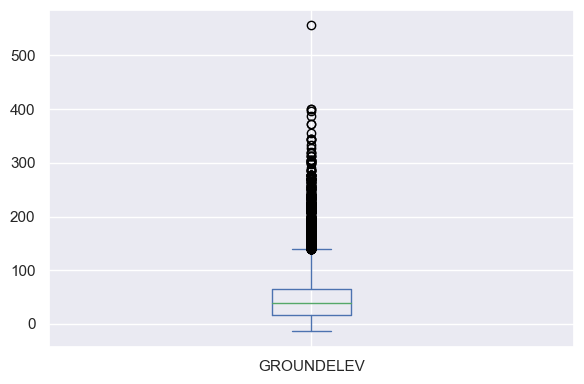

In [20]:
fig, ax = plt.subplots(figsize=(6, 4))

building_footprints['GROUNDELEV'].plot.box(ax=ax)

plt.tight_layout()

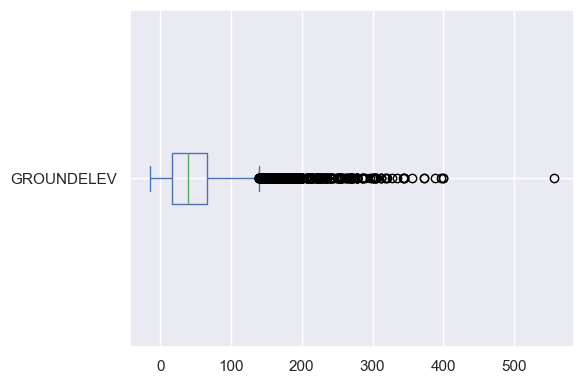

In [21]:
fig, ax = plt.subplots(figsize=(6, 4))

building_footprints['GROUNDELEV'].plot.box(vert=False, ax=ax)

plt.tight_layout()

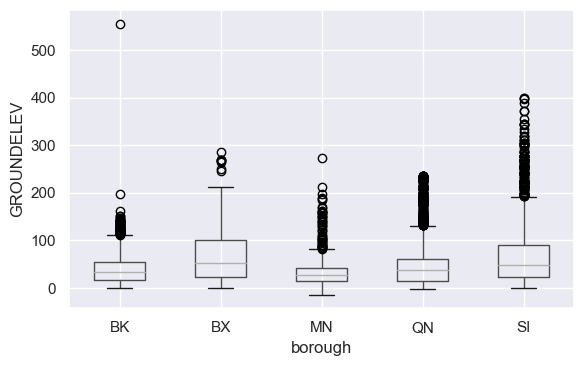

In [22]:
building_footprints_box = building_footprints.loc[:, ['borough', 'GROUNDELEV']]

fig, ax = plt.subplots(figsize=(6, 4))

building_footprints_box.boxplot(
    by='borough',
    ax=ax
)

plt.title('')
plt.suptitle('')
plt.xlabel('borough')
plt.ylabel('GROUNDELEV')

plt.tight_layout()

## 3.5 Kernel Density Estimate Plot

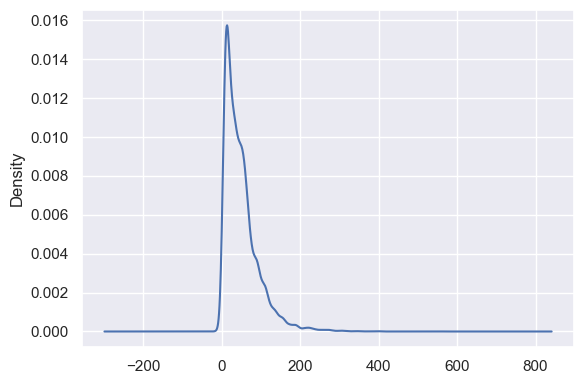

In [23]:
fig, ax = plt.subplots(figsize=(6, 4))

building_footprints['GROUNDELEV'].plot.kde(ax=ax)

plt.tight_layout()

## 3.6 Area Plot

In [24]:
# pivot data by borough
area = pd.pivot_table(
    building_footprints, 
    values='DOITT_ID', 
    index=['CNSTRCT_YR'], 
    columns = ['borough'], 
    aggfunc='count'
)
                             
area.head()

borough      BK   BX  MN   QN   SI
CNSTRCT_YR                        
2010        248  141  58  574  340
2011        270   99  43  631  447
2012        428   75  59  510  384
2013        260   51  57  360  185
2014        150   79  23  343  278

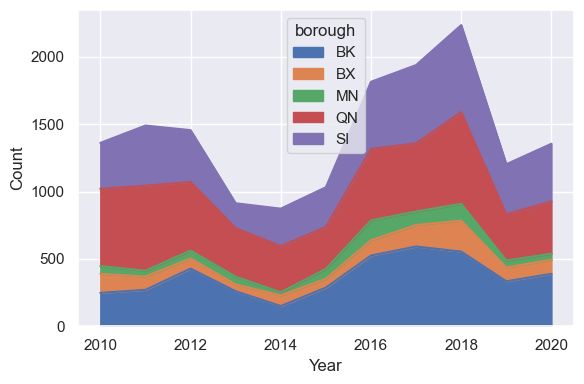

In [25]:
fig, ax = plt.subplots(figsize=(6, 4))

area.plot.area(ax=ax)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()

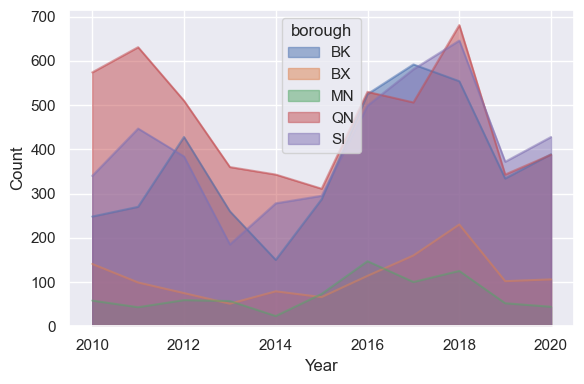

In [26]:
fig, ax = plt.subplots(figsize=(6, 4))

area.plot.area(
    ax=ax,
    stacked=False
)

plt.xticks(rotation=0)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()

In [27]:
# cumulative sum
area_cumsum = area.cumsum()
area_cumsum.head()

borough       BK   BX   MN    QN    SI
CNSTRCT_YR                            
2010         248  141   58   574   340
2011         518  240  101  1205   787
2012         946  315  160  1715  1171
2013        1206  366  217  2075  1356
2014        1356  445  240  2418  1634

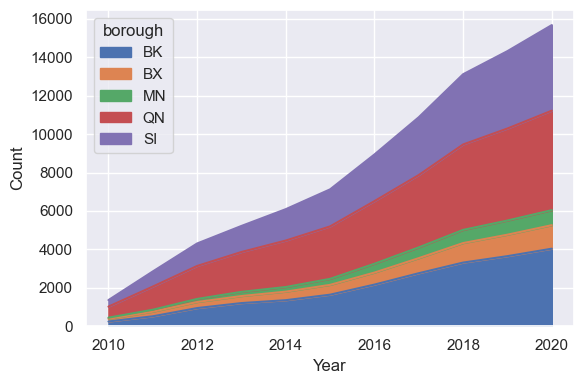

In [28]:
fig, ax = plt.subplots(figsize=(6, 4))

area_cumsum.plot.area(ax=ax)

plt.xticks(rotation=0)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()

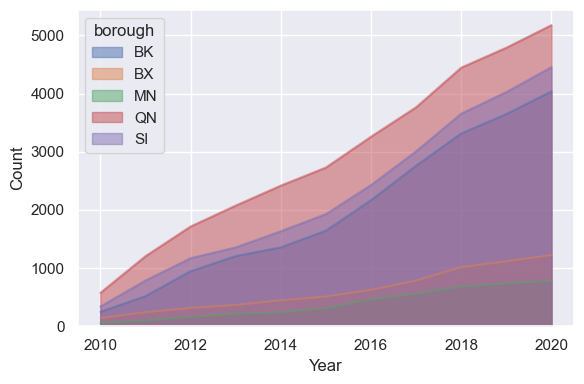

In [29]:
fig, ax = plt.subplots(figsize=(6, 4))

area_cumsum.plot.area(
    ax=ax,
    stacked=False
)

plt.xticks(rotation=0)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()

## 3.7 Scatter Plot

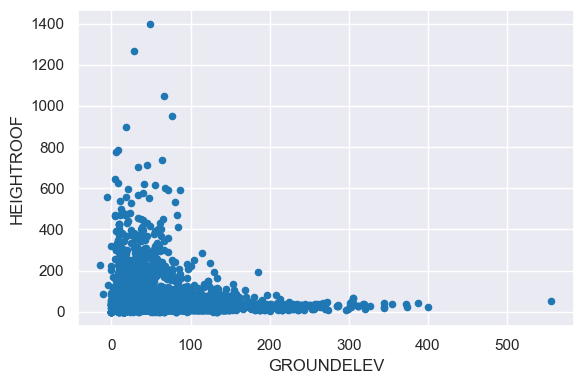

In [30]:
fig, ax = plt.subplots(figsize=(6, 4))

building_footprints.plot.scatter(
    x='GROUNDELEV', 
    y='HEIGHTROOF', 
    color='tab:blue',
    ax=ax
)

plt.xlabel('GROUNDELEV', fontsize=12)
plt.ylabel('HEIGHTROOF', fontsize=12)

plt.tight_layout()

## 3.8 Hexagonal Bin Plot

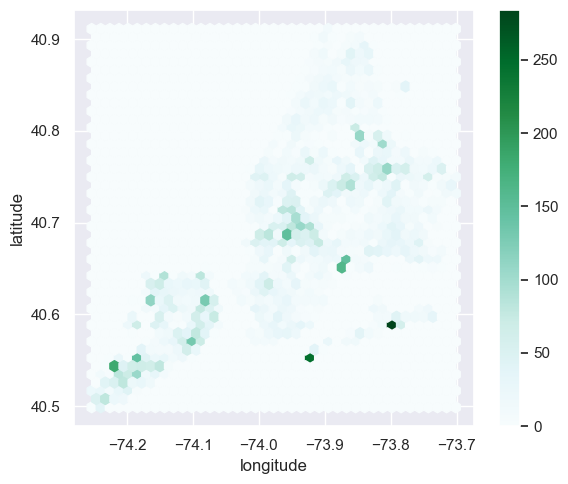

In [31]:
fig, ax = plt.subplots(figsize=(6, 5))

building_footprints.plot.hexbin(
    x='longitude', 
    y='latitude', 
    gridsize=40, 
    ax=ax
)

plt.tight_layout()

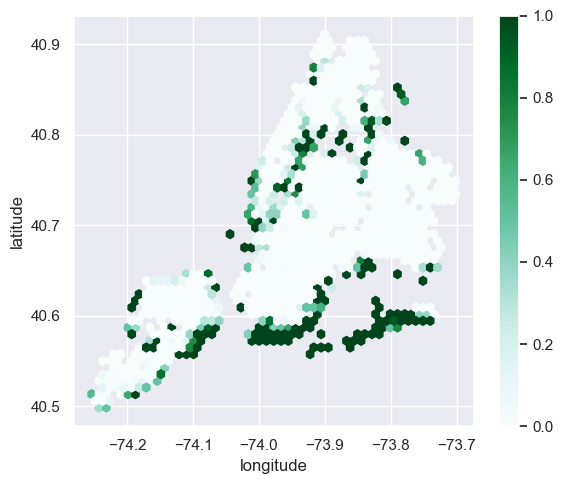

In [32]:
fig, ax = plt.subplots(figsize=(6, 5))

# grid size = 50
building_footprints.plot.hexbin(
    x='longitude', 
    y='latitude', 
    C='pfirm15_flag', 
    gridsize=50, 
    ax=ax
)

plt.tight_layout()

## 3.9 Pie Plot

In [33]:
pie = (
    building_footprints
    .groupby('borough')['DOITT_ID']
    .count()
    .rename("count")
    .sort_values(ascending=False)
)

pie

borough
QN    5177
SI    4455
BK    4037
BX    1223
MN     781
Name: count, dtype: int64

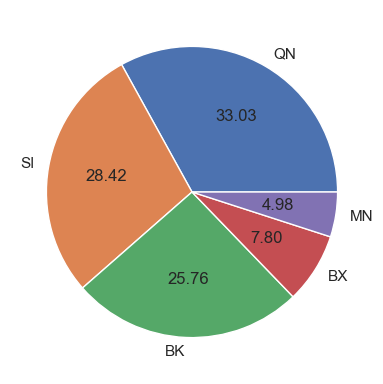

In [34]:
ax = pie.plot.pie(figsize=(6, 4), autopct='%.2f') 

ax.axes.get_yaxis().set_visible(False)
plt.tight_layout()

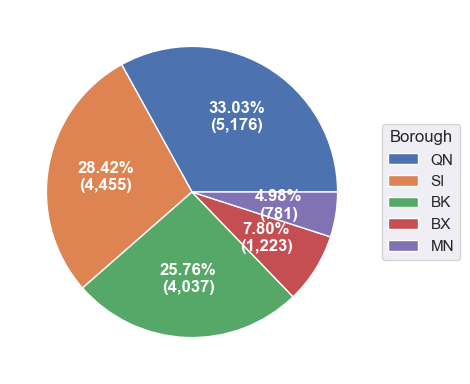

In [35]:
fig, ax = plt.subplots(figsize=(6, 4), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(pct/100. * np.sum(allvals))
    return "{:.2f}%\n({:,})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(
    pie, 
    autopct=lambda pct: func(pct, pie),
    textprops=dict(color="w")
)

ax.legend(
    wedges, 
    pie.index,
    title="Borough",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
) 

plt.setp(autotexts, size=12, weight="bold")
plt.tight_layout()

# 4. Plotting with Seaborn
The Seaborn package is beautiful and the documentation is essentially a tutorial in statistical data visualizations. Get familiar with the documentation, read and learn from the author about best practices, and apply those methodologies to your own data.

The Seaborn tutorial and user guide can be found here: https://seaborn.pydata.org/tutorial.html.
## 4.1 Distribution Plots

### 4.1.1 Histograms

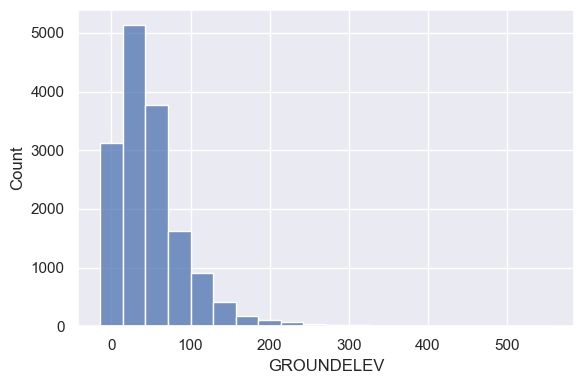

In [36]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(
    building_footprints['GROUNDELEV'],
    bins=20,
    ax=ax
)

plt.tight_layout()

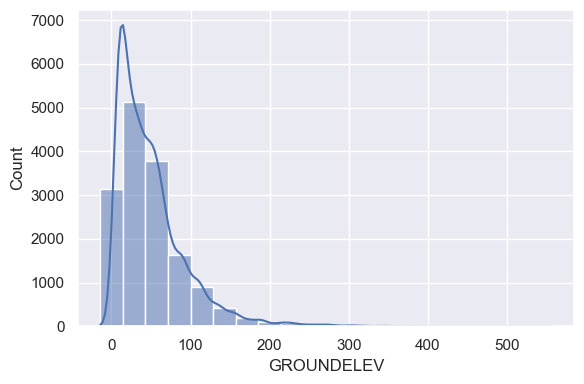

In [37]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(
    building_footprints['GROUNDELEV'],
    bins=20,
    kde=True,
    ax=ax
)

plt.tight_layout()

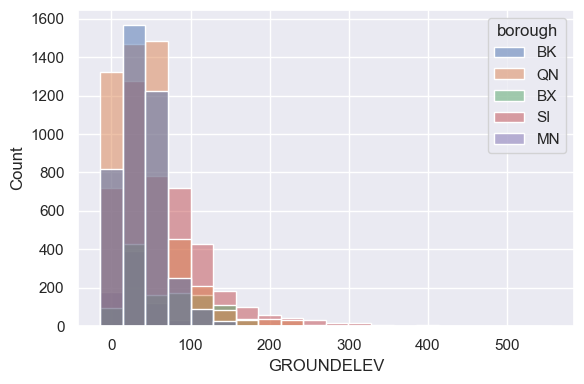

In [38]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(
    data=building_footprints, 
    x='GROUNDELEV',
    bins=20,
    hue='borough',
    ax=ax
)

plt.tight_layout()

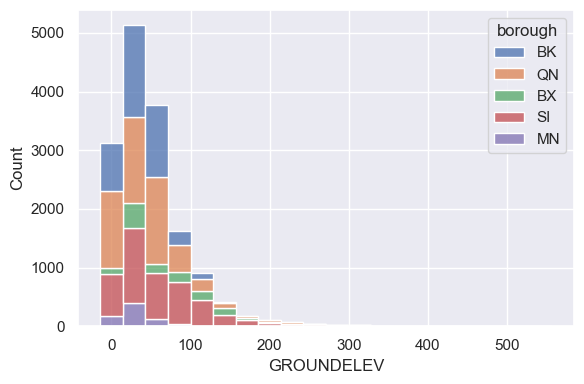

In [39]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(
    data=building_footprints, 
    x='GROUNDELEV',
    bins=20,
    hue='borough',
    multiple="stack",
    ax=ax
)

plt.tight_layout()

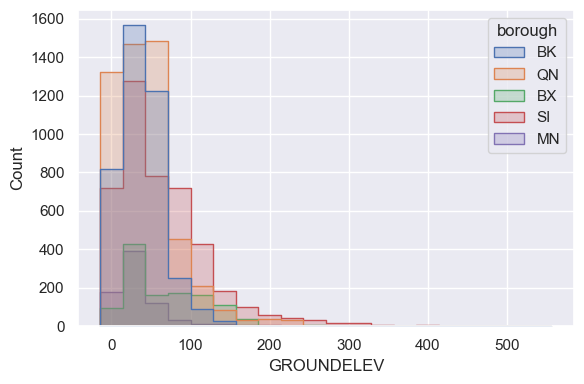

In [40]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(
    data=building_footprints, 
    x='GROUNDELEV',
    bins=20,
    hue='borough',
    element="step",
    ax=ax
)

plt.tight_layout()

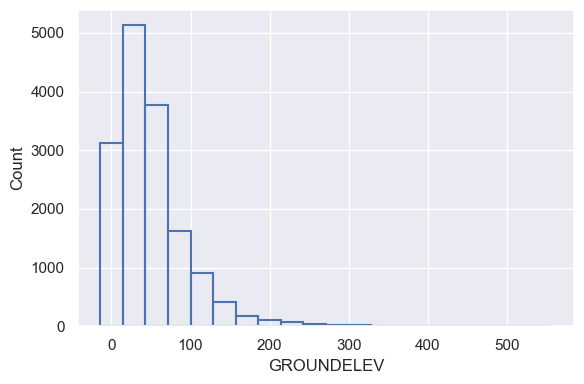

In [41]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(
    data=building_footprints, 
    x='GROUNDELEV',
    bins=20,
    fill=False,
    ax=ax
)

plt.tight_layout()

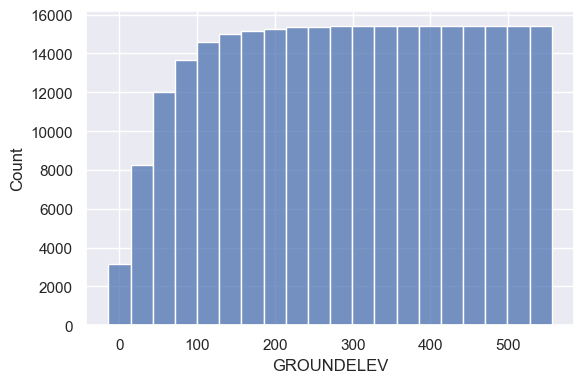

In [42]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(
    building_footprints['GROUNDELEV'],
    bins=20,
    cumulative=True,
    ax=ax
)

plt.tight_layout()

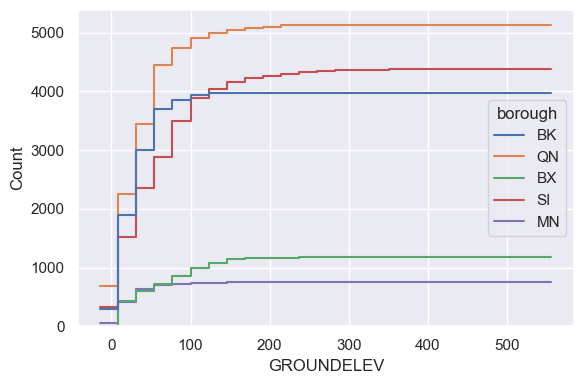

In [43]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(
    data=building_footprints,
    x='GROUNDELEV',
    bins=25,
    hue='borough',
    cumulative=True,
    element="step",
    fill=False,
    ax=ax
)

plt.tight_layout()

### 4.1.2 Kernel Density Estimation (KDE) Plots

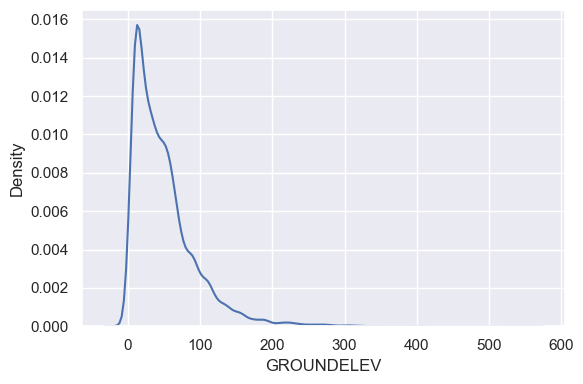

In [44]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.kdeplot(
    building_footprints['GROUNDELEV'],
    ax=ax
)

plt.tight_layout()

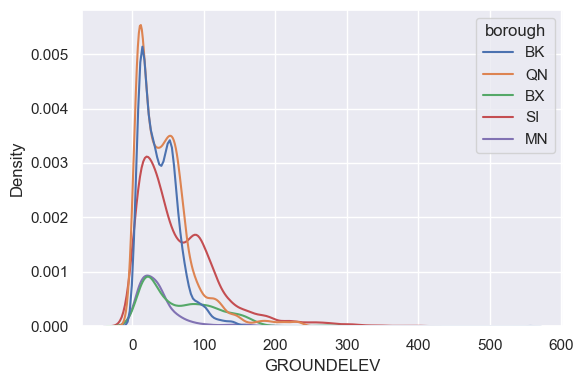

In [45]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.kdeplot(
    data=building_footprints, 
    x='GROUNDELEV',
    hue='borough', 
    ax=ax
)

plt.tight_layout()

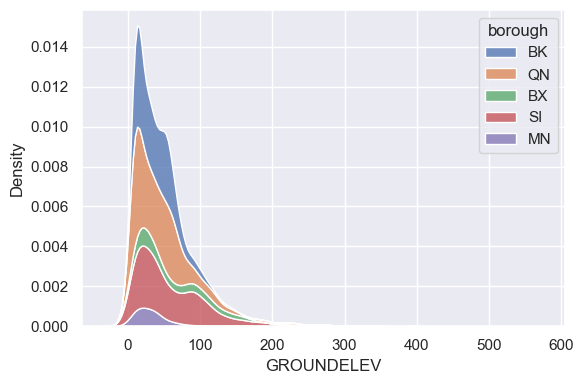

In [46]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.kdeplot(
    data=building_footprints, 
    x='GROUNDELEV',
    hue='borough', 
    multiple='stack', 
    ax=ax
)

plt.tight_layout()

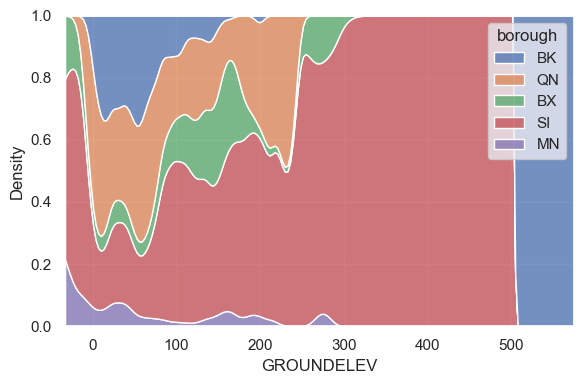

In [47]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.kdeplot(
    data=building_footprints, 
    x='GROUNDELEV',
    hue='borough', 
    multiple='fill', 
    ax=ax
)

plt.tight_layout()

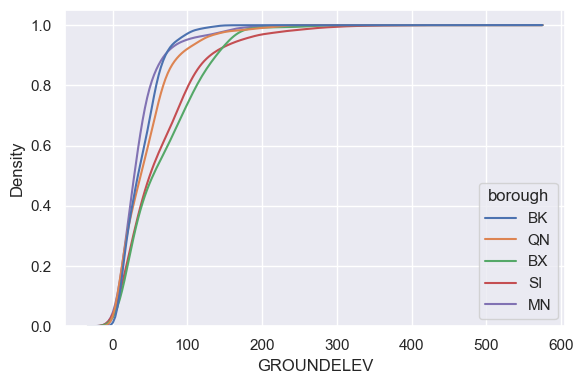

In [48]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.kdeplot(
    data=building_footprints, 
    x='GROUNDELEV',
    hue='borough', 
    cumulative=True, 
    common_norm=False, 
    common_grid=True, 
    ax=ax
)

plt.tight_layout()

### 4.1.3 Empirical Cumulative Distribution Functions (ECDF)

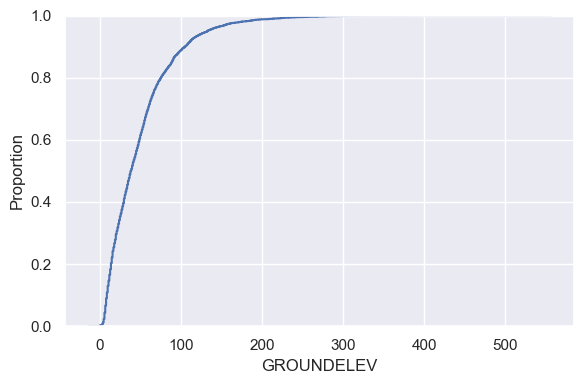

In [49]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.ecdfplot(
    data=building_footprints, 
    x="GROUNDELEV", 
    ax=ax
)

plt.tight_layout()

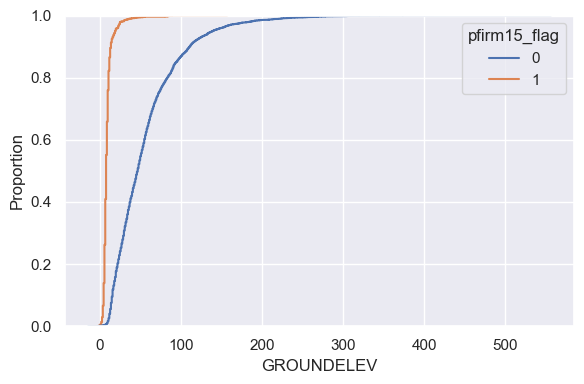

In [50]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.ecdfplot(
    data=building_footprints, 
    x="GROUNDELEV", 
    hue='pfirm15_flag', 
    ax=ax
)

plt.tight_layout()

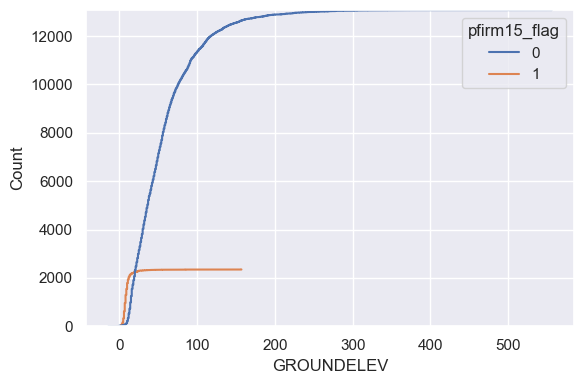

In [51]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.ecdfplot(
    data=building_footprints, 
    x="GROUNDELEV", 
    hue='pfirm15_flag',
    stat="count", 
    ax=ax
)

plt.tight_layout()

### 4.1.4 Distribution Plots onto a Facet Grid

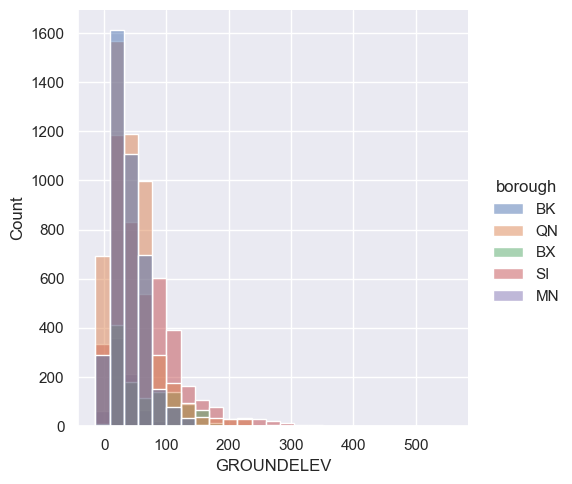

In [52]:
sns.displot(
    data=building_footprints, 
    x="GROUNDELEV", 
    bins=25,
    hue="borough", 
    kind="hist",
    height=5,
    facet_kws={"legend_out": True}
)

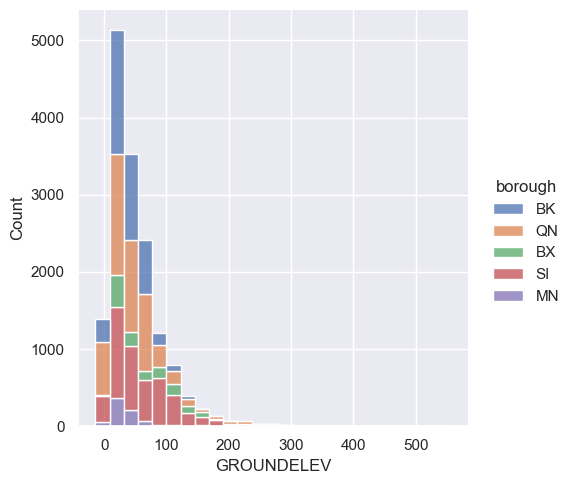

In [53]:
sns.displot(
    data=building_footprints, 
    x="GROUNDELEV", 
    bins=25,
    hue="borough", 
    multiple="stack",
    height=5,
    facet_kws={"legend_out": True}
)

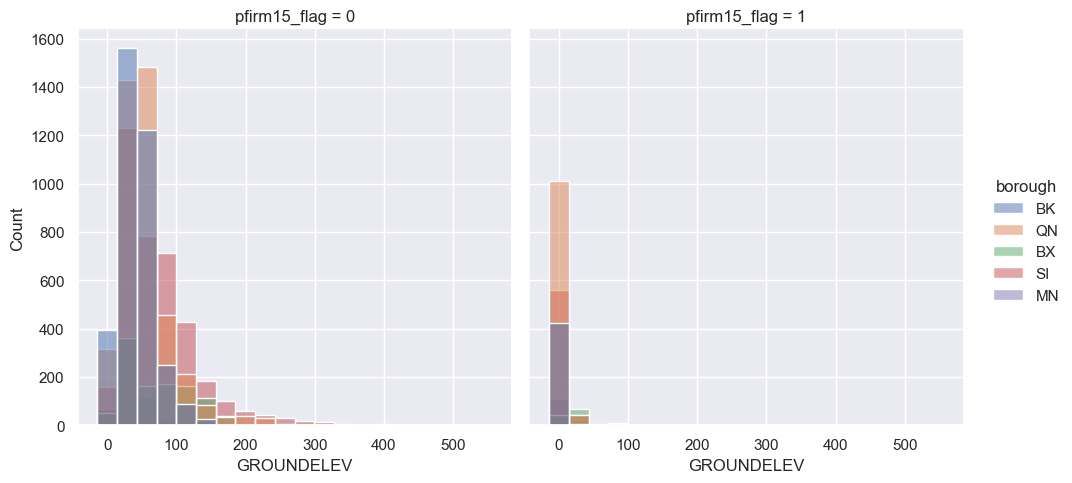

In [54]:
sns.displot(
    data=building_footprints, 
    x="GROUNDELEV", 
    bins=20,
    hue="borough", 
    col="pfirm15_flag", 
    kind="hist",
    height=5,
    facet_kws={"legend_out": True}
)

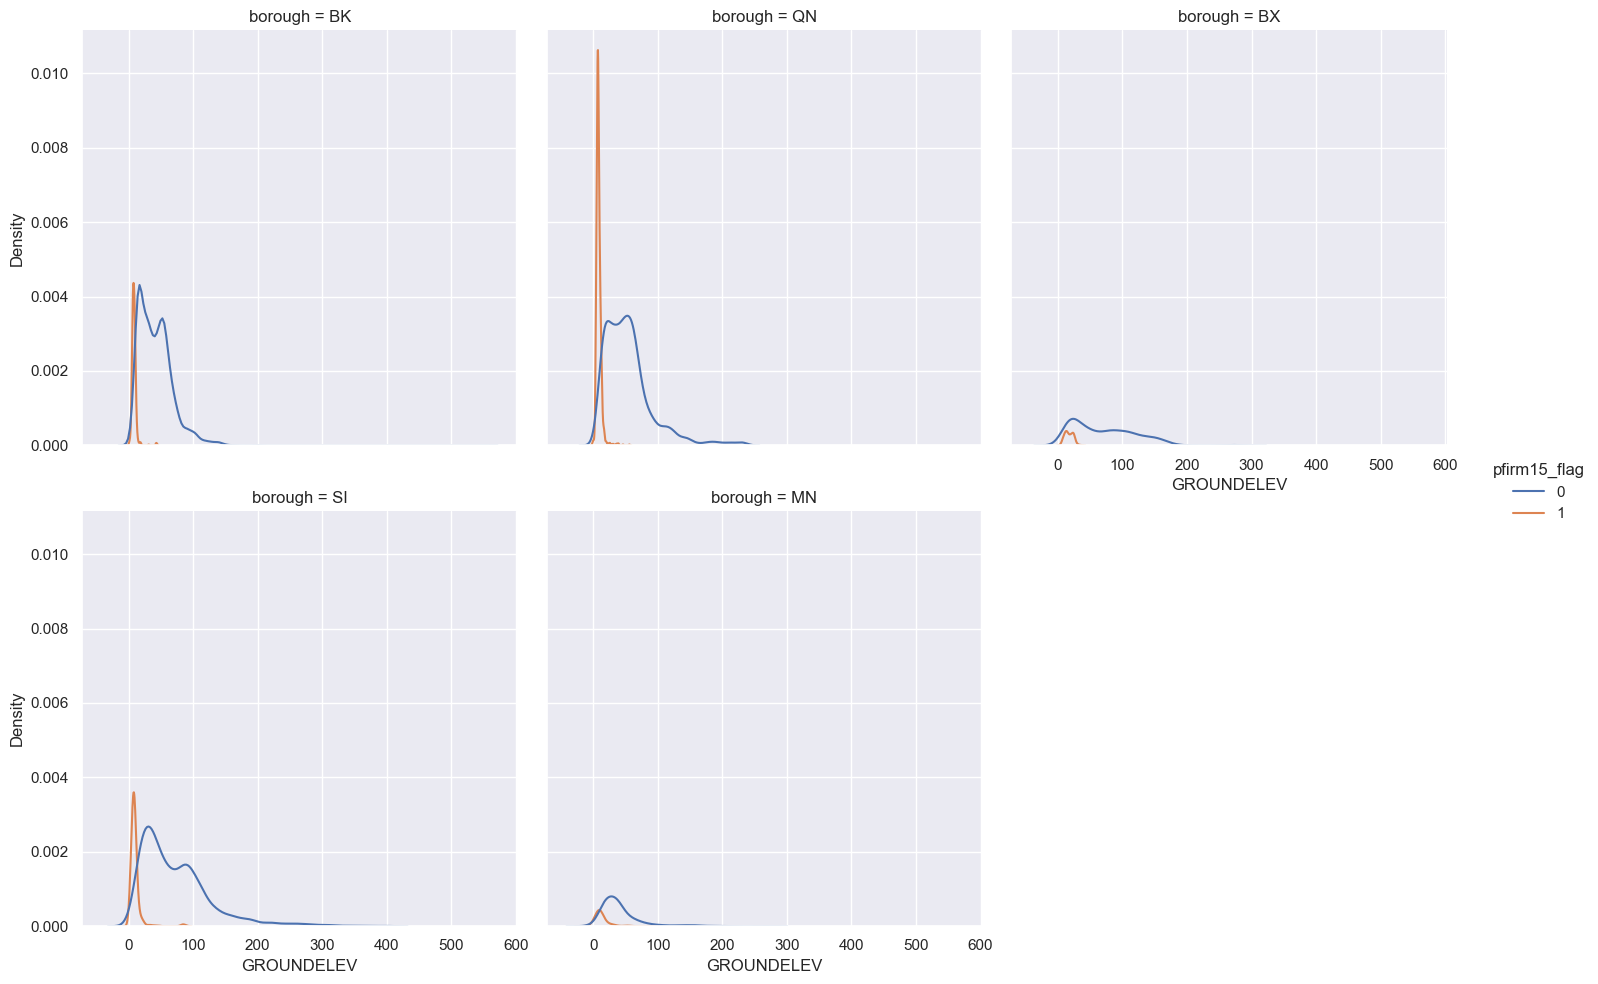

In [55]:
sns.displot(
    data=building_footprints, 
    x="GROUNDELEV", 
    hue="pfirm15_flag", 
    col="borough", 
    kind="kde",
    col_wrap=3,
    facet_kws={"legend_out": True}
)

## 4.2 Relational Plots
### 4.2.1 Line Plot

In [56]:
by_year = (
    building_footprints
    .groupby('CNSTRCT_YR')[['DOITT_ID']]
    .count()
    .rename(columns={'DOITT_ID': 'count'})
    .reset_index()
)

by_year.head()

CNSTRCT_YR  count
0        2010   1361
1        2011   1490
2        2012   1456
3        2013    913
4        2014    873

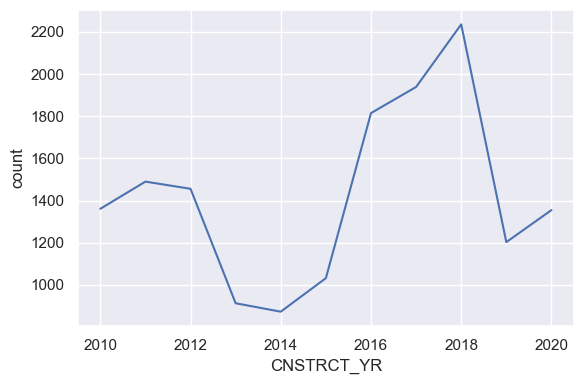

In [57]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.lineplot(
    data=by_year, 
    x="CNSTRCT_YR", 
    y="count", 
    ax=ax
)

plt.tight_layout()

In [58]:
line_pivot = pd.pivot_table(
    building_footprints, 
    values='DOITT_ID', 
    index=['CNSTRCT_YR'], 
    columns=['borough'], 
    aggfunc='count'
)

line_pivot.head()

borough      BK   BX  MN   QN   SI
CNSTRCT_YR                        
2010        248  141  58  574  340
2011        270   99  43  631  447
2012        428   75  59  510  384
2013        260   51  57  360  185
2014        150   79  23  343  278

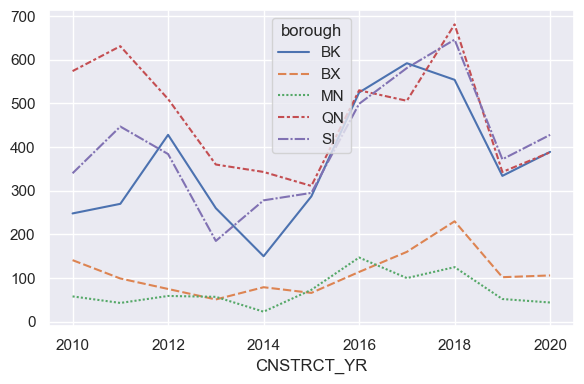

In [59]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.lineplot(
    data=line_pivot,
    ax=ax
)

plt.tight_layout()

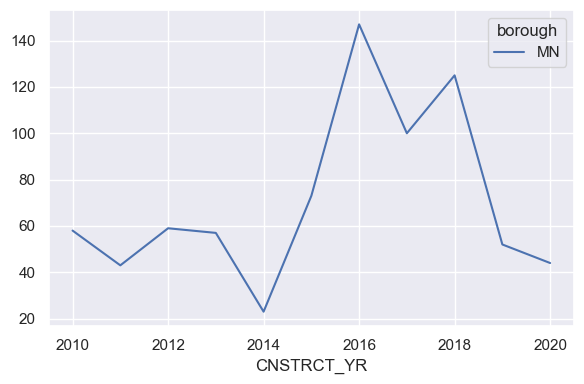

In [60]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.lineplot(
    data=line_pivot.loc[:, ['MN']], 
    ax=ax
)

plt.tight_layout()

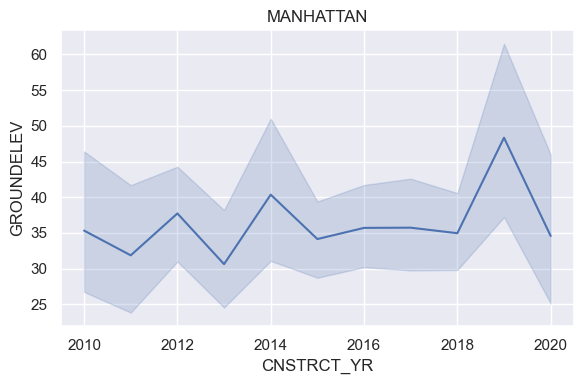

In [61]:
fig, ax = plt.subplots(figsize=(6, 4))

manhattan_df = building_footprints.loc[building_footprints['borough'] == 'MN']

# estimator='mean', errorbar=('ci', 95)
sns.lineplot(
    data=manhattan_df, 
    x="CNSTRCT_YR", 
    y="GROUNDELEV", 
    ax=ax
)

plt.title('MANHATTAN')
plt.ylabel('GROUNDELEV')

plt.tight_layout()

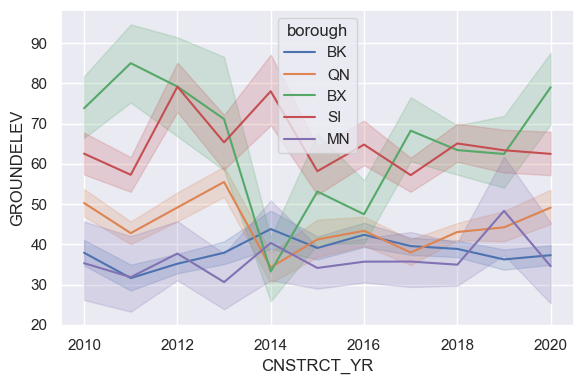

In [62]:
fig, ax = plt.subplots(figsize=(6, 4))

# estimator='mean', errorbar=('ci', 95)
sns.lineplot(
    data=building_footprints, 
    x="CNSTRCT_YR", 
    y="GROUNDELEV",
    hue='borough', 
    ax=ax
)

plt.ylabel('GROUNDELEV')

plt.tight_layout()

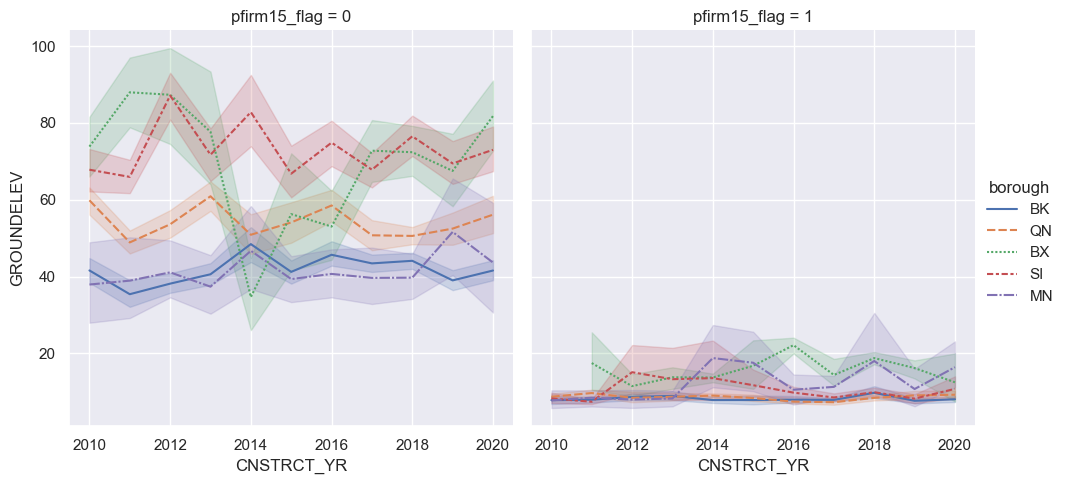

In [63]:
grid = sns.relplot(
    data=building_footprints, 
    x="CNSTRCT_YR", 
    y="GROUNDELEV",
    col="pfirm15_flag", 
    hue="borough", 
    style="borough",
    kind="line",
    height=5,
    facet_kws={"legend_out": True}
)

grid.set_axis_labels("CNSTRCT_YR", "GROUNDELEV")

### 4.2.2 Scatter Plots

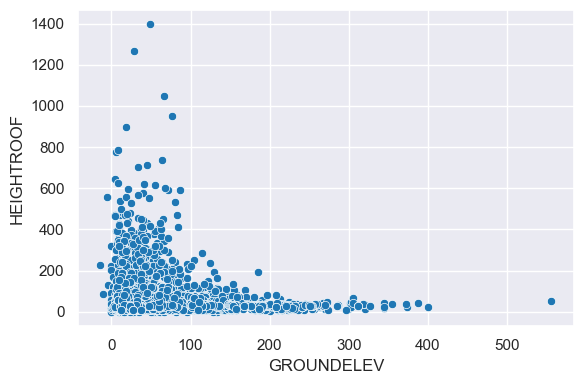

In [64]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.scatterplot(
    x=building_footprints['GROUNDELEV'],
    y=building_footprints['HEIGHTROOF'], 
    color='tab:blue',
    ax=ax
)

plt.tight_layout()

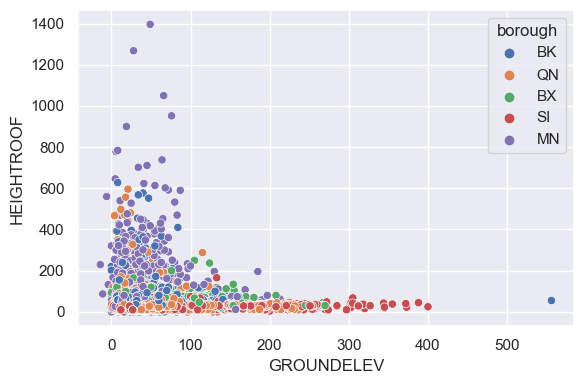

In [65]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.scatterplot(
    x=building_footprints['GROUNDELEV'],
    y=building_footprints['HEIGHTROOF'], 
    data=building_footprints, 
    hue="borough", 
    ax=ax
)

plt.tight_layout()

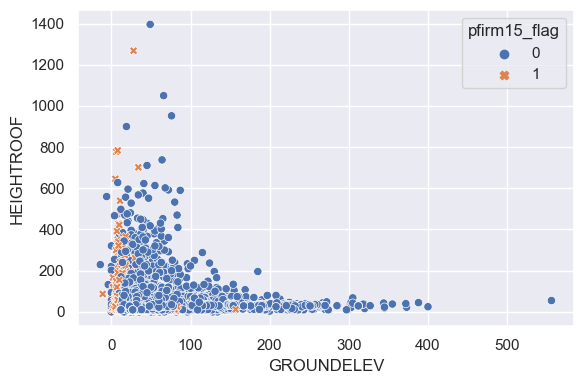

In [66]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.scatterplot(
    x=building_footprints['GROUNDELEV'],
    y=building_footprints['HEIGHTROOF'], 
    data=building_footprints, 
    hue="pfirm15_flag", 
    style="pfirm15_flag", 
    ax=ax
)

plt.tight_layout()

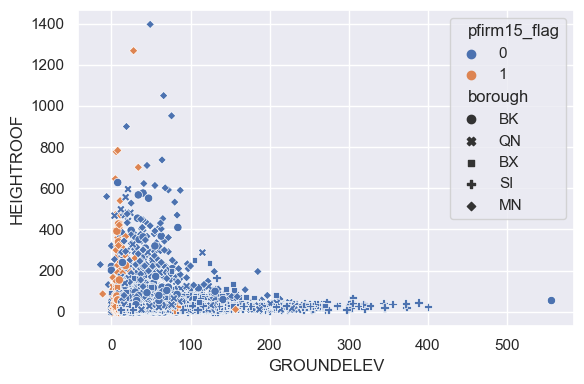

In [67]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.scatterplot(
    x=building_footprints['GROUNDELEV'],
    y=building_footprints['HEIGHTROOF'], 
    data=building_footprints, 
    hue="pfirm15_flag", 
    style="borough", 
    ax=ax
)

plt.tight_layout()

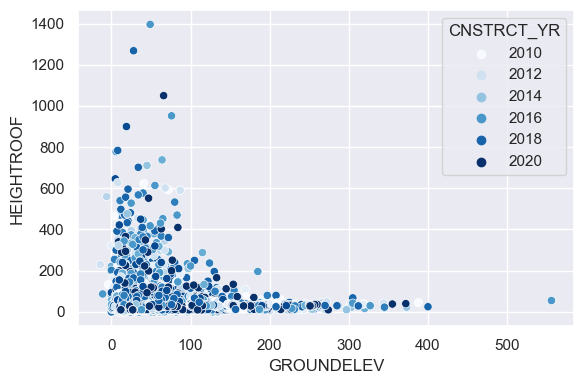

In [68]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.scatterplot(
    x=building_footprints['GROUNDELEV'],
    y=building_footprints['HEIGHTROOF'], 
    data=building_footprints,
    palette='Blues',
    hue="CNSTRCT_YR", 
    ax=ax
)

plt.tight_layout()

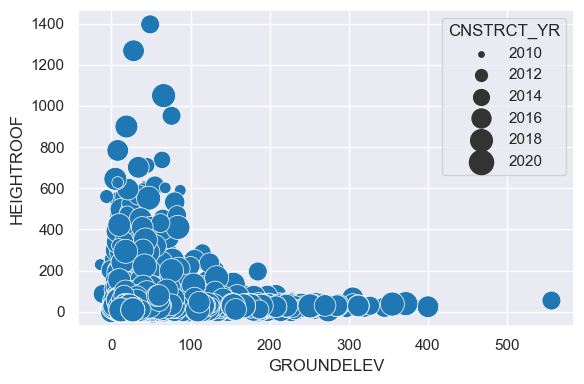

In [69]:
plt.figure(figsize=(6, 4))

sns.scatterplot(
    data=building_footprints,
    x='GROUNDELEV',
    y='HEIGHTROOF', 
    size="CNSTRCT_YR", 
    sizes=(15, 300),
    color='tab:blue'
)

plt.tight_layout()

### 4.2.3 Relational Plots onto a Facet Grid

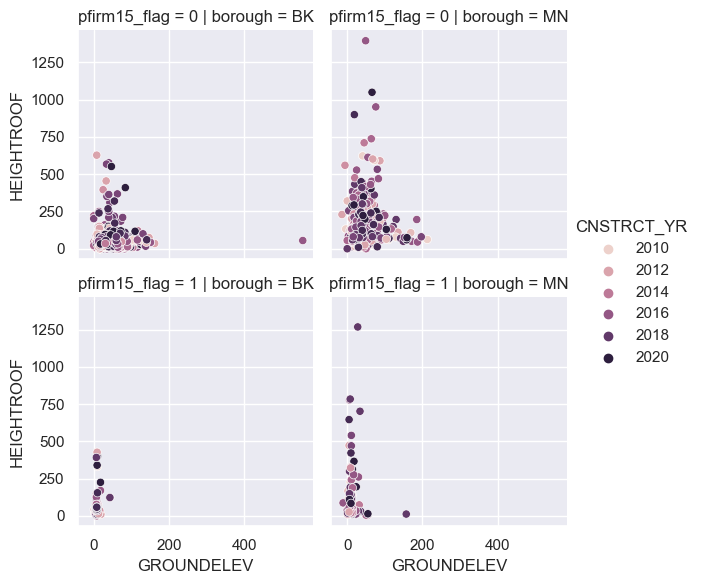

In [70]:
data = (
    building_footprints
    .loc[building_footprints['borough'].isin(["MN", "BK"])]
)

sns.relplot(
    data=data, 
    x="GROUNDELEV", 
    y="HEIGHTROOF", 
    hue="CNSTRCT_YR", 
    col="borough", 
    row="pfirm15_flag",
    facet_kws={"legend_out": True},
    height=3
)

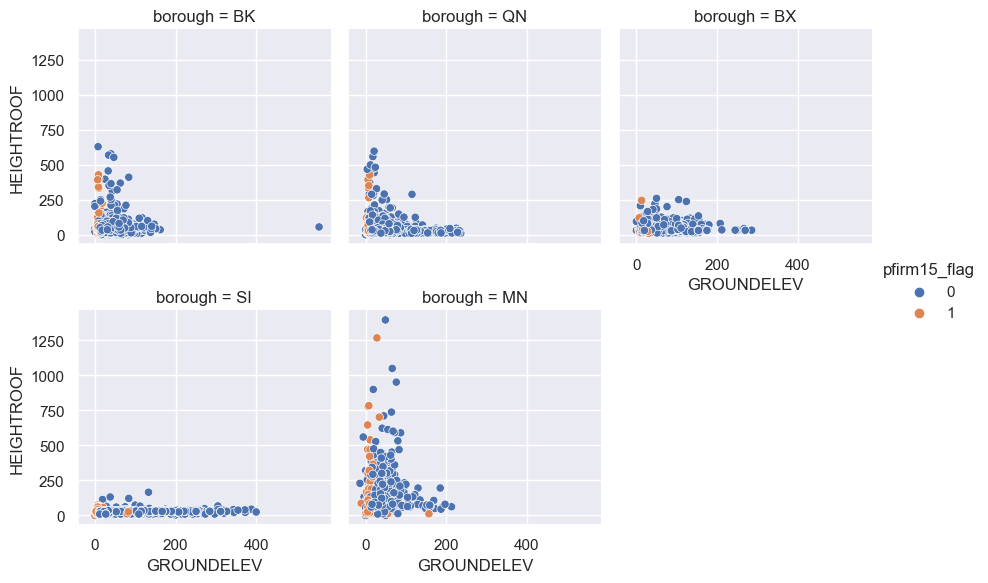

In [71]:
sns.relplot(
    data=building_footprints, 
    x="GROUNDELEV", 
    y="HEIGHTROOF", 
    hue="pfirm15_flag", 
    col="borough", 
    col_wrap=3,
    facet_kws={"legend_out": True},
    height=3
)

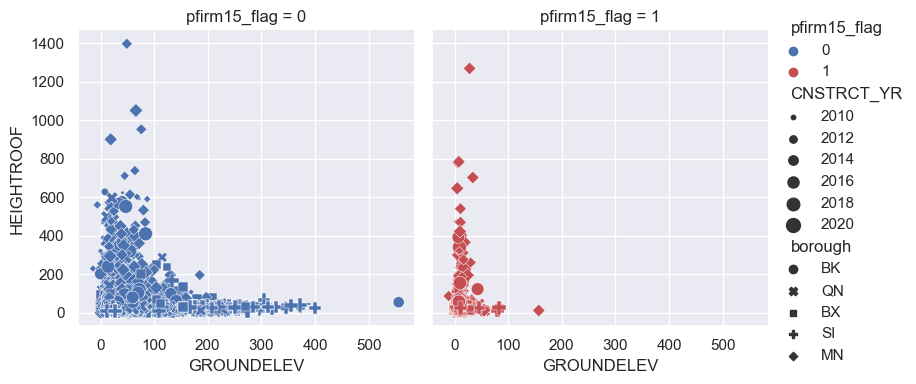

In [72]:
sns.relplot(
    data=building_footprints, 
    x="GROUNDELEV", 
    y="HEIGHTROOF", 
    col="pfirm15_flag",
    hue="pfirm15_flag", 
    size="CNSTRCT_YR", 
    style="borough",
    palette=["b", "r"], 
    sizes=(10, 100),
    height=4,
    facet_kws={"legend_out": True}
)

## 4.3 Joint Grids
### 4.3.1 Scatter Plots

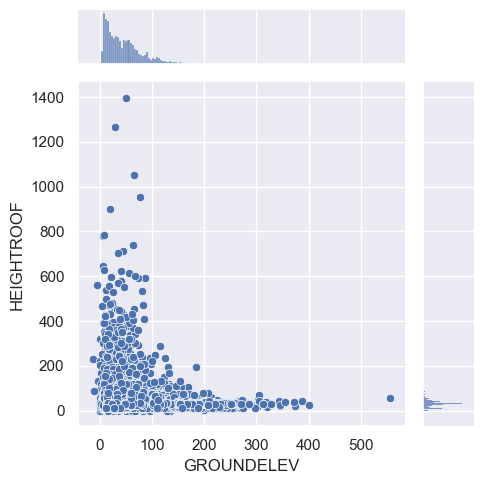

In [73]:
sns.jointplot(
    x='GROUNDELEV',
    y='HEIGHTROOF',
    data=building_footprints,
    height=5
)

plt.tight_layout()

### 4.3.2 Hexbin Plots

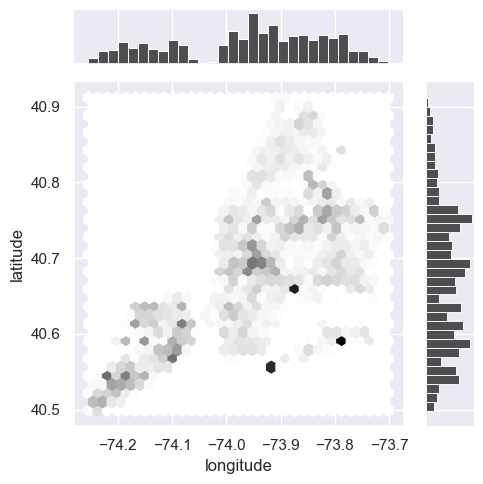

In [74]:
sns.jointplot(
    x='longitude',
    y='latitude', 
    data=building_footprints,
    kind="hex", 
    color="k", 
    height=5
) 

plt.tight_layout()

### 4.3.3 Kernel Density Estimation

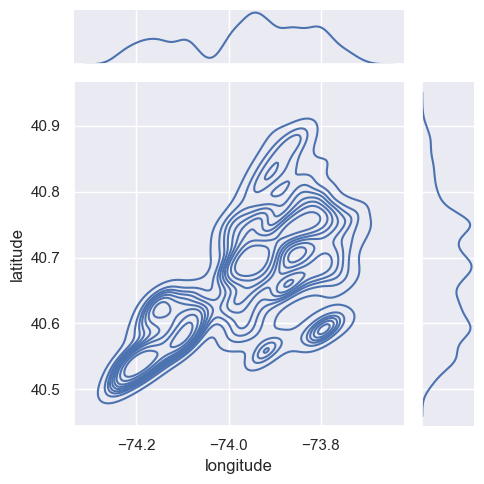

In [75]:
sample_df = (
    building_footprints
    .loc[building_footprints['CNSTRCT_YR'].between(2010, 2020)]
)

sns.jointplot(
    x='longitude', 
    y='latitude', 
    data=sample_df, 
    kind="kde", 
    height=5
)

plt.tight_layout()

## 4.4 Visualizing Pairwise Relationships in a Dataset

### 4.4.1 Pair Plot

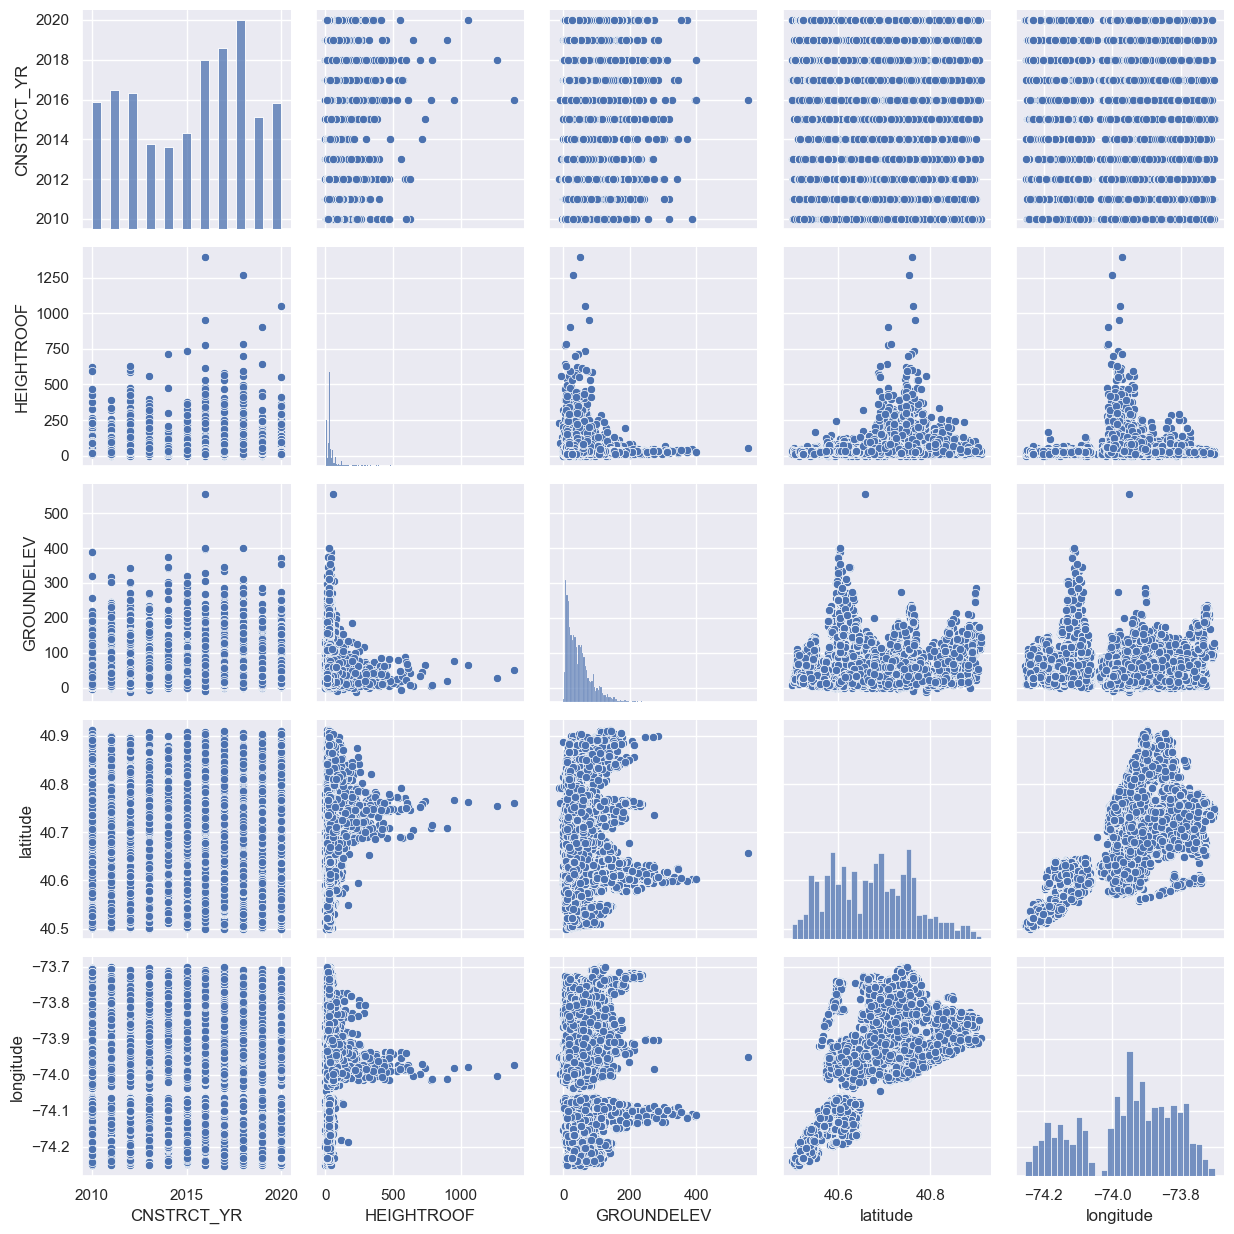

In [76]:
cols = [
    'borough',
    'CNSTRCT_YR',
    'HEIGHTROOF', 'GROUNDELEV',
    'latitude', 'longitude'
]

sample_df = building_footprints.loc[:, cols]

sns.pairplot(sample_df)

plt.tight_layout()

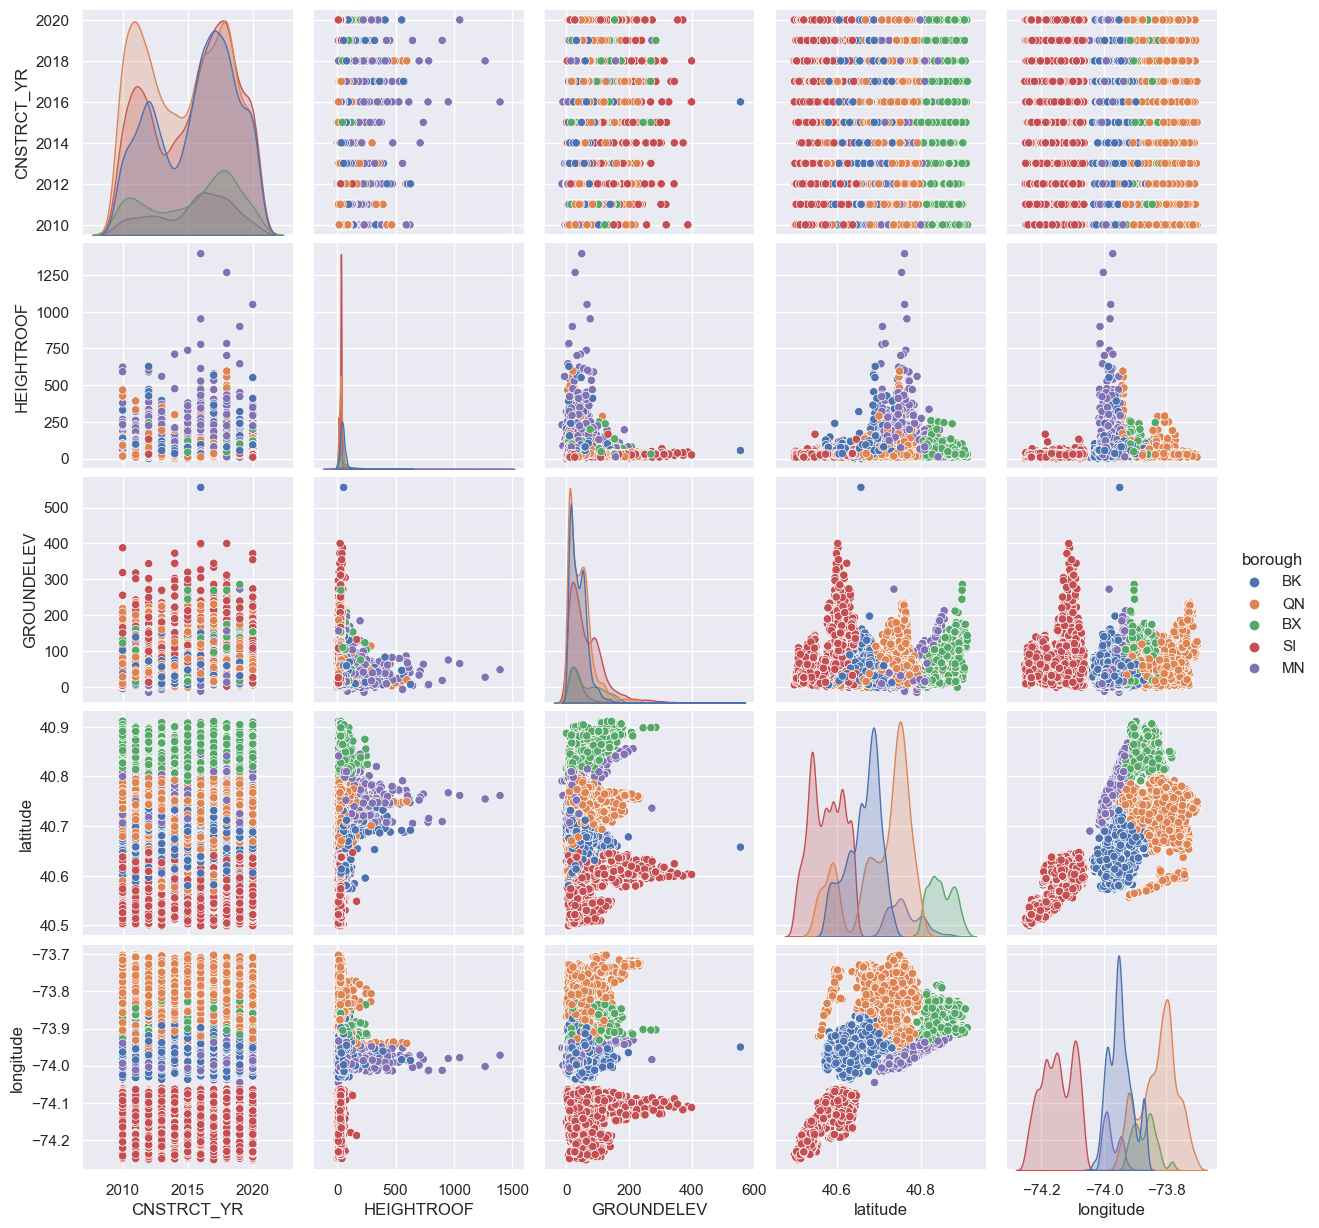

In [77]:
sns.pairplot(
    sample_df, 
    hue="borough"
)

### 4.5 Heat Maps

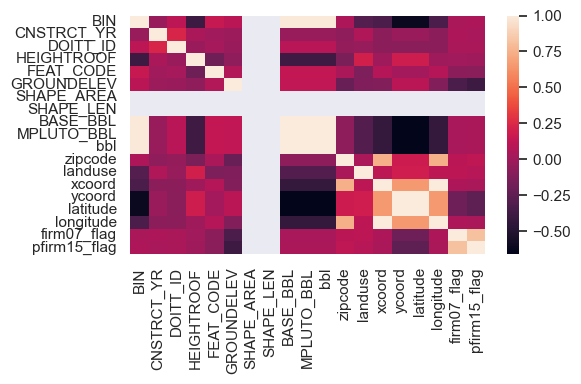

In [78]:
fig, ax = plt.subplots(figsize=(6, 4))

# blank columns mean all values are NULL
sns.heatmap(
    building_footprints.corr(numeric_only=True), 
    ax=ax
)

plt.tight_layout()

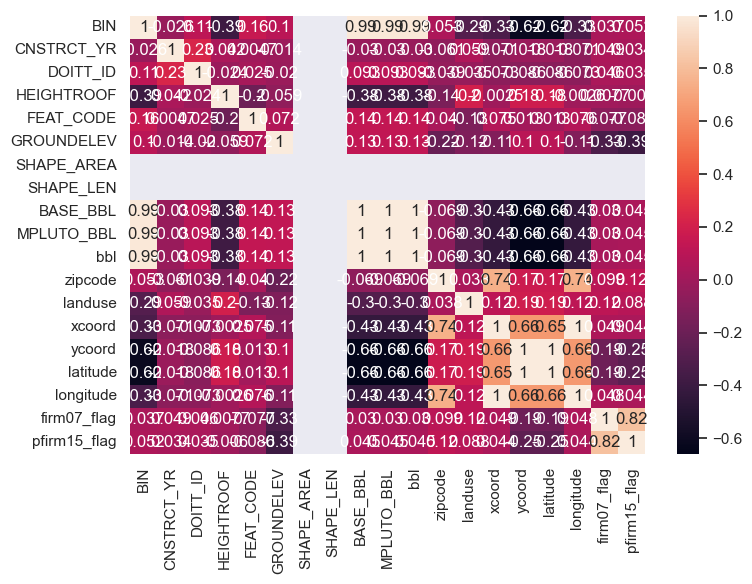

In [79]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(
    building_footprints.corr(numeric_only=True), 
    annot=True, 
    ax=ax
)

plt.tight_layout()

## 4.6 Categorical Plots

### 4.6.1 Bar Plot

In [80]:
boro_count = (
    building_footprints
    .groupby(by='borough')[['DOITT_ID']]
    .count()
    .rename(columns={'DOITT_ID':'count'})
    .reset_index()
)

boro_count.head()

borough  count
0      BK   4037
1      BX   1223
2      MN    781
3      QN   5177
4      SI   4455

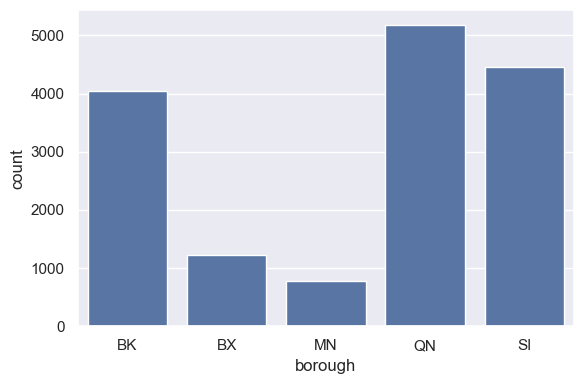

In [81]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.barplot(
    data=boro_count,
    x='borough',  
    y='count', 
    color="C0", 
    ax=ax
)

plt.tight_layout()

In [82]:
boro_count = (
    building_footprints
    .groupby(by=['borough', 'pfirm15_flag'])[['DOITT_ID']]
    .count()
    .rename(columns={'DOITT_ID':'count'})
    .reset_index()
)

boro_count.head()

borough  pfirm15_flag  count
0      BK             0   3601
1      BK             1    436
2      BX             0   1111
3      BX             1    112
4      MN             0    639

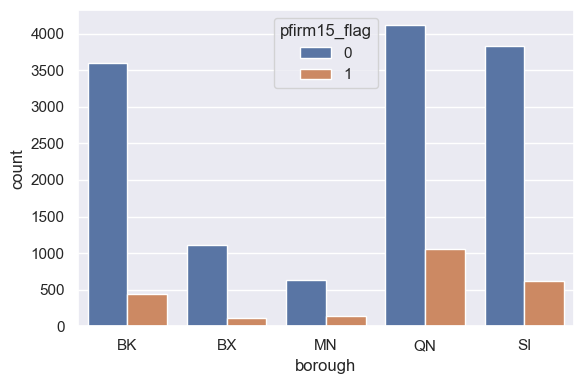

In [83]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.barplot(
    data=boro_count,
    x='borough',  
    y='count',
    hue='pfirm15_flag', 
    ax=ax
)

plt.tight_layout()

### 4.6.2 Scatter Plot

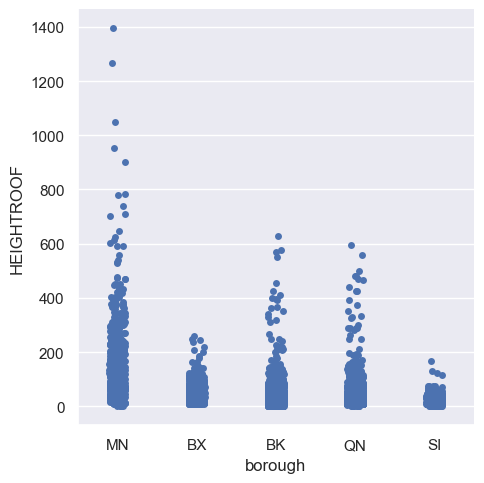

In [84]:
sns.catplot(
    x='borough', 
    y='HEIGHTROOF', 
    order=["MN", "BX", "BK", "QN", "SI"], 
    data=building_footprints, 
    height=5
)

plt.tight_layout()

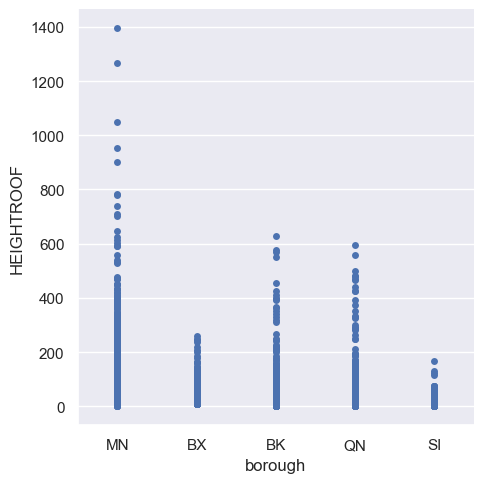

In [85]:
sns.catplot(
    x='borough', 
    y='HEIGHTROOF', 
    data=building_footprints, 
    order=["MN", "BX", "BK", "QN", "SI"], 
    height=5, 
    jitter=False
)

plt.tight_layout()

### 4.6.3 Scatter Plot - Swarm

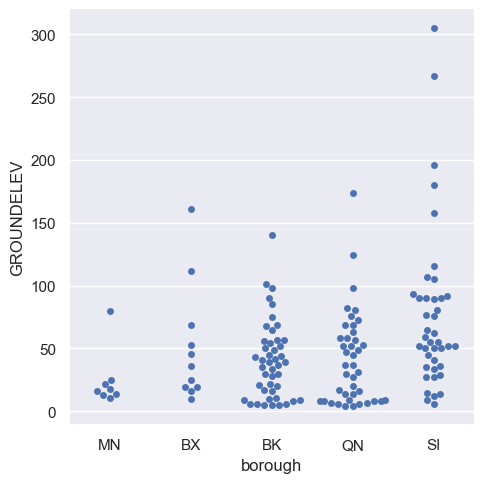

In [86]:
# demonstration purposes, sample data to fit all points on graph
data = building_footprints.sample(150)

order = ["MN", "BX", "BK", "QN", "SI"]

sns.catplot(
    x='borough', 
    y='GROUNDELEV', 
    kind='swarm', 
    order=order, 
    data=data, 
    height=5
)

plt.tight_layout()

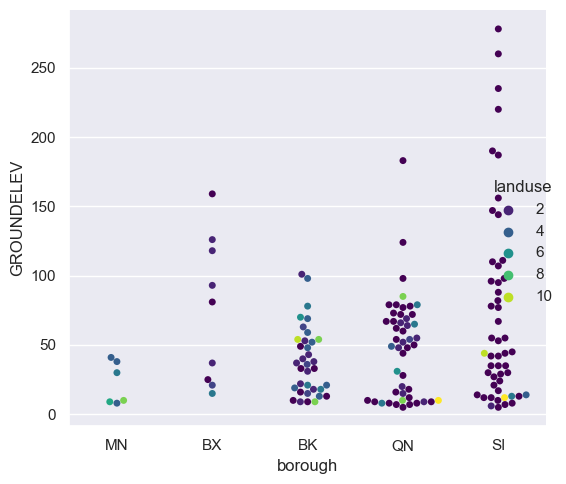

In [87]:
# demonstration purposes, sample data to fit all points on graph
data = building_footprints.sample(150)

order = ["MN", "BX", "BK", "QN", "SI"]

sns.catplot(
    x='borough', 
    y='GROUNDELEV', 
    hue='landuse', 
    kind='swarm', 
    data=data, 
    palette='viridis',
    order=order, 
    height=5,
    legend=True
)

plt.tight_layout()

### 4.6.4 Box Plot

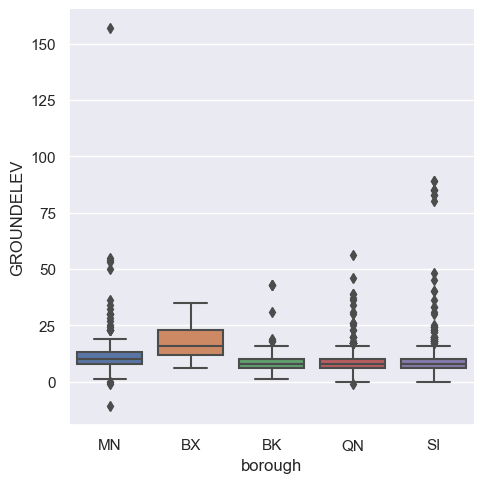

In [88]:
# buildings in preliminary flood zone
data = (
    building_footprints
    .loc[building_footprints['pfirm15_flag'] == 1]
)

order = ["MN", "BX", "BK", "QN", "SI"]

sns.catplot(
    x="borough", 
    y="GROUNDELEV", 
    kind="box", 
    data=data, 
    order=order, 
    height=5
)

plt.tight_layout()

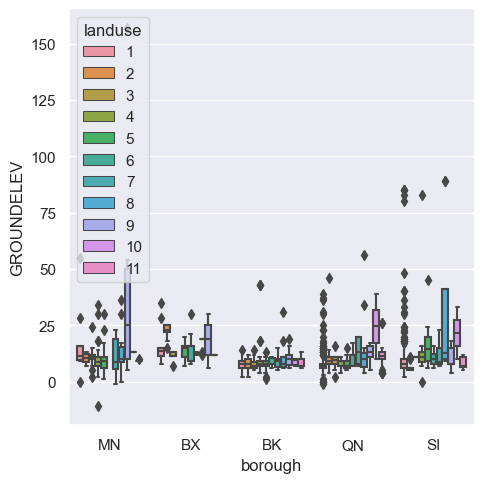

In [89]:
# buildings in preliminary flood zone
data = (
    building_footprints
    .loc[building_footprints['pfirm15_flag'] == 1]
)

order = ["MN", "BX", "BK", "QN", "SI"]

sns.catplot(
    x="borough", 
    y="GROUNDELEV", 
    kind="box", 
    hue='landuse', 
    data=data, 
    order=order, 
    height=5,
    legend=False
)

plt.legend(loc='upper left', title='landuse')

plt.tight_layout()

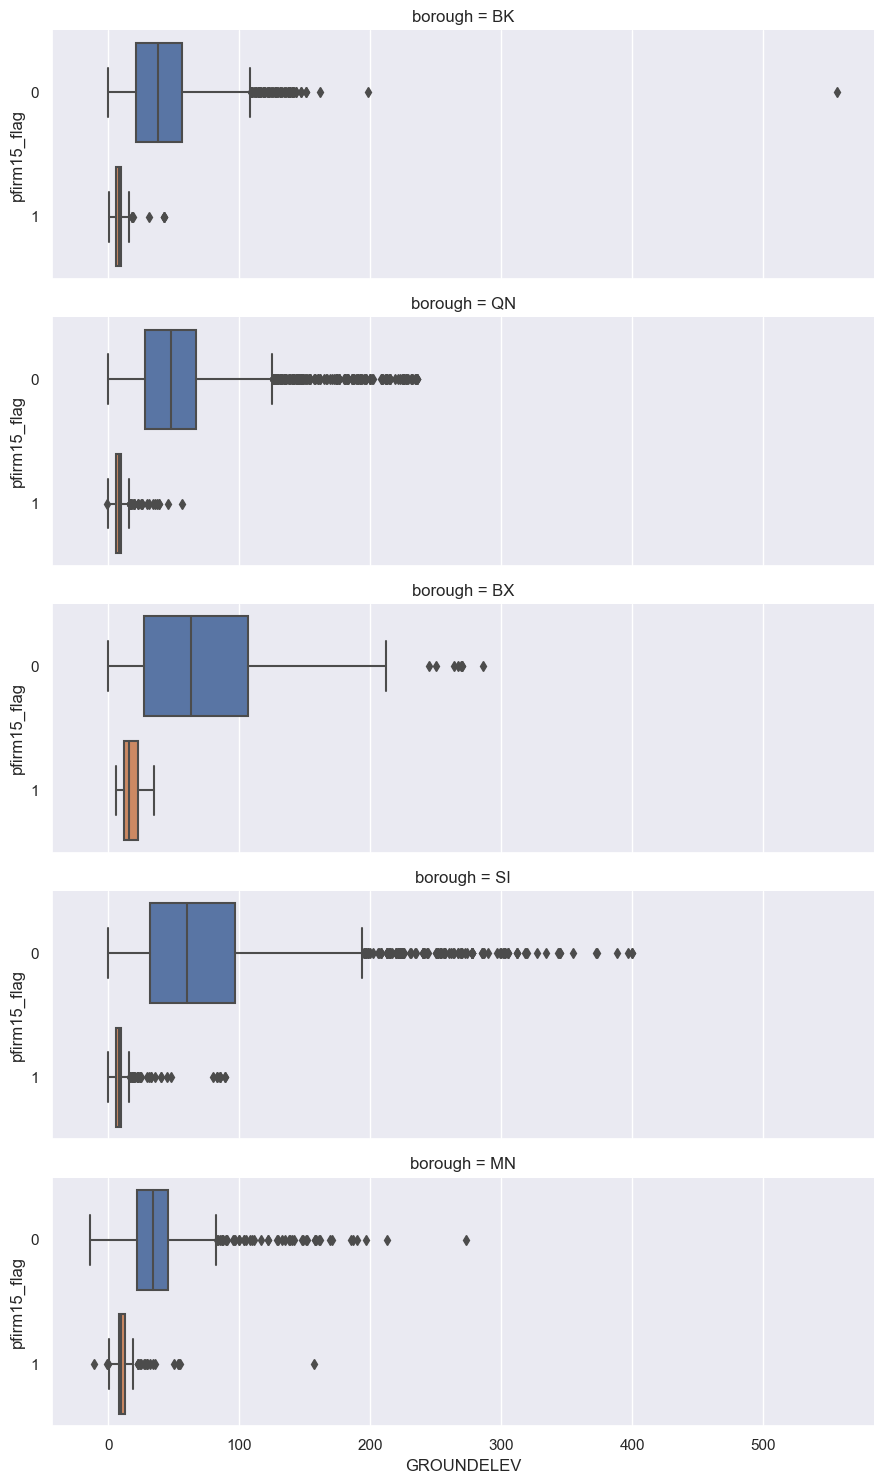

In [90]:
sns.catplot(
    x="GROUNDELEV", 
    y="pfirm15_flag", 
    row="borough",
    kind="box", 
    orient="h", 
    height=3, 
    aspect=3, 
    data=building_footprints
)

plt.tight_layout()

### 4.6.5 Boxen Plot

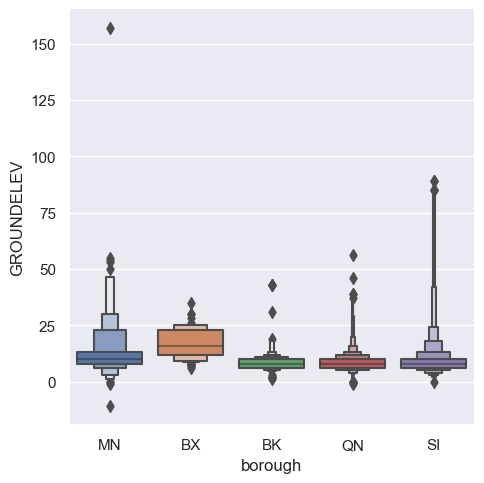

In [91]:
# buildings in preliminary flood zone
data = (
    building_footprints
    .loc[building_footprints['pfirm15_flag'] == 1]
)

order = ["MN", "BX", "BK", "QN", "SI"]

sns.catplot(
    x="borough", 
    y="GROUNDELEV", 
    kind="boxen", 
    data=data, 
    order=order, 
    height=5
)

plt.tight_layout()

### 4.6.6 Violin Plot

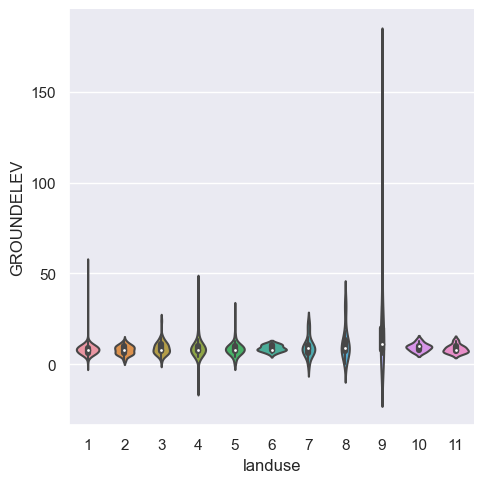

In [92]:
# buildings in preliminary flood zone and in Manhattan or Brooklyn
data = (
    building_footprints
    .loc[
        (building_footprints['pfirm15_flag'] == 1)
         & (building_footprints['borough'].isin(["MN", "BK"]))
    ]
)

sns.catplot(
    x="landuse", 
    y="GROUNDELEV",  
    kind="violin", 
    split=True, 
    data=data, 
    height=5
)

plt.tight_layout()

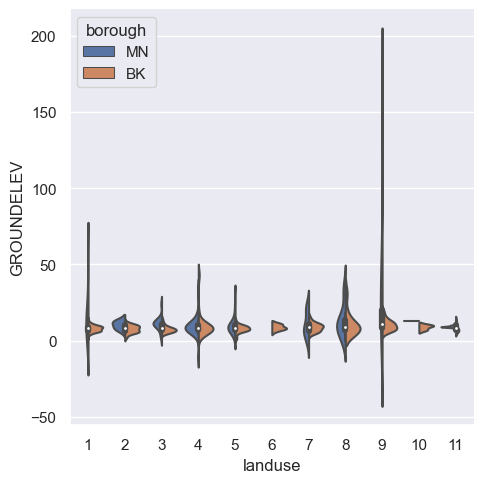

In [93]:
# buildings in preliminary flood zone and in Manhattan or Brooklyn
data = (
    building_footprints
    .loc[
        (building_footprints['pfirm15_flag'] == 1)
         & (building_footprints['borough'].isin(["MN", "BK"]))
    ]
)

sns.catplot(
    x="landuse", 
    y="GROUNDELEV", 
    hue="borough", 
    kind="violin", 
    split=True, 
    data=data, 
    height=5, 
    legend=False
)

plt.legend(loc='upper left', title='borough')

plt.tight_layout()

# 5. Conclusion

In this notebook, we reviewed various types of plots and visualizations using the Python libraries seaborn and pandas, both built on top of the library matplotlib. In Part 4, we demonstrate how to work with geospatial data and create various types of maps with the Python library geopandas.